# Introduction
**This will be your workspace for the [Machine Learning course](https://www.kaggle.com/learn/machine-learning).**

You will need to translate the concepts to work with the data in this notebook, the Iowa data. Each page in the Machine Learning course includes instructions for what code to write at that step in the course.

# Write Your Code Below

In [58]:
import pandas as pd

main_file_path = 'train_kaggle_xgboost.csv' # this is the path to the Iowa data that you will use
data = pd.read_csv(main_file_path)

# Run this code block with the control-enter keys on your keyboard. Or click the blue botton on the left
print('Some output from running this cell')



Some output from running this cell


In [59]:
print(data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [60]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [61]:
iowa_saleprices = data.SalePrice

In [62]:
iowa_saleprices.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [63]:
cols = ['SaleCondition', 'SalePrice']

In [64]:
sale_metrics = data[cols]

In [65]:
sale_metrics.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [66]:
# Select predictor variable here.
Y = data.SalePrice

In [67]:
predictor_cols = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

In [68]:
X = data[predictor_cols]

In [69]:
from sklearn.tree import DecisionTreeRegressor
iowa_model = DecisionTreeRegressor()
iowa_model.fit(X, Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [70]:
iowa_model.predict(X.head())

array([208500., 181500., 223500., 140000., 250000.])

In [71]:
from sklearn.metrics import mean_absolute_error

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [74]:
iowa_new_model = DecisionTreeRegressor()
fit_model = iowa_new_model.fit(X_train, Y_train)

In [75]:
predictions = fit_model.predict(X_test)

In [76]:
print(mean_absolute_error(predictions, Y_test))

32123.80821917808


In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [78]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, Y_train, Y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 5  		 Mean Absolute Error:  35190
Max leaf nodes: 50  		 Mean Absolute Error:  27825
Max leaf nodes: 500  		 Mean Absolute Error:  32662
Max leaf nodes: 5000  		 Mean Absolute Error:  33382


In [79]:
from sklearn.ensemble import RandomForestRegressor
iowa_regressor = RandomForestRegressor(random_state=0)
iow_rf_model = iowa_regressor.fit(X_train, Y_train)
predictions = iow_rf_model.predict(X_test)
print(mean_absolute_error(predictions, Y_test))

24396.513744292235


Model 1 : Remove columns with nans

In [80]:
def score_dataset(X_train, X_test, Y_train, Y_test):
    my_model = RandomForestRegressor(random_state=0)
    my_model.fit(X_train, Y_train)
    predictions = my_model.predict(X_test)
    return(mean_absolute_error(predictions, Y_test))

In [93]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()

X = data.drop(columns='SalePrice').select_dtypes(exclude='object').copy()

Y = data.SalePrice.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
col_x_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# Get data once again to make sure that missing data is handled correctly.
X_train_reduced = X_train.drop(col_x_missing, axis=1)
X_test_reduced = X_test.drop(col_x_missing, axis=1)
print(X_train_reduced.columns)
score_dataset(X_train_reduced, X_test_reduced, Y_train, Y_test)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


19895.280821917808

Model 2: After imputation.

In [94]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
X = data.drop(columns='SalePrice').select_dtypes(exclude='object').copy()
Y = data.SalePrice.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)
score_dataset(imputed_X_train, imputed_X_test, Y_train, Y_test)

20032.675342465755

Model 3 : Along with imputation, add a column ,showing missed columns.

In [95]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()

X = data.drop(columns='SalePrice').select_dtypes(exclude='object').copy()
Y = data.SalePrice.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
col_x_missing = [col for col in X_train.columns if X_train[col].isnull().any()]
X_train = X_train.copy()
X_test = X_test.copy()
for col in col_x_missing:    
    X_train[col + 'missing'] = X_train[col].isnull()
    X_test[col + 'missing'] = X_train[col].isnull()    

imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)
score_dataset(imputed_X_train, imputed_X_test, Y_train, Y_test)



19740.9597260274

Check one hot encoding !

In [96]:
from sklearn.model_selection import cross_val_score

def get_mae(X, Y):
    return (-1) * cross_val_score(RandomForestRegressor(1), X, Y, scoring='neg_mean_absolute_error').mean()

In [100]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()

#X = data.select_dtypes(exclude='object').copy()
X = data.drop(columns=['SalePrice'])
col_x_missing = [col for col in X.columns if X[col].isnull().any()]
X = X.drop(col_x_missing, axis=1)
Y = data.SalePrice.copy()
X_one_hot = pd.get_dummies(X)
X_normal_predictors = X.select_dtypes(exclude='object').copy()
X_train, X_test, Y_train, Y_test = train_test_split(X_one_hot, Y, random_state=0)
col_x_missing = [col for col in X_one_hot.columns if X_one_hot[col].isnull().any()]

print("Error on test set is {0}".format(score_dataset(X_train, X_test, Y_train, Y_test)))
print("Cross validation error(with one hot encoding) is {0}".format(get_mae(X_one_hot, Y)))
print("Cross validation error(with non categorical predictors) is {0}".format(get_mae(X_normal_predictors, Y)))


Error on test set is 18907.065753424657
Cross validation error(with one hot encoding) is 28512.972549665796
Cross validation error(with non categorical predictors) is 29409.151714114298


In [101]:
def get_mean_absolute_error_model(my_model, X_test, Y_test):
    predictions = my_model.predict(X_test)    
    return(mean_absolute_error(predictions, Y_test))
    

In [127]:
from xgboost import XGBRegressor
my_model = XGBRegressor(seed=1)


In [135]:
import numpy as np

In [152]:
# Get X and Y in one go.
Y = data.SalePrice
X = data.drop(columns=['SalePrice']).select_dtypes(exclude='object')

# Do imputation on relevant columns.
my_imputer = Imputer()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

print(np.shape(X_train), np.shape(X_test), np.shape(Y_train), np.shape(Y_test))
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)

# Do XGboost
my_model.fit(X_train, Y_train, verbose=False)
print(my_model)
# Make predictions on the test set.
print("Mean absolute error is {0}".format(get_mean_absolute_error_model(my_model, X_test, Y_test)))


(1095, 37) (365, 37) (1095,) (365,)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1, silent=True,
       subsample=1)
Mean absolute error is 17165.850770547946


Write the same code using pipeline !

In [200]:
##
# Get X and Y in one go.
from sklearn.pipeline import make_pipeline
Y = data.SalePrice
X = data.drop(columns=['SalePrice']).select_dtypes(exclude='object')

# Do imputation on relevant columns.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
my_pipeline = make_pipeline(Imputer(), XGBRegressor(random_state=0))
my_pipeline.fit(X_train, Y_train) 
predictions = my_pipeline.predict(X_test)
print(my_model)
# Make predictions on the test set.
print("Mean absolute error is {0}".format(mean_absolute_error(predictions, Y_test)))


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Mean absolute error is 17165.850770547946


Use cross validation in the above example !

In [207]:
from sklearn.model_selection import cross_val_score

In [209]:
cross_val_score_val = cross_val_score(my_pipeline, X, Y, scoring='neg_mean_absolute_error').mean()
print((-1)* float(cross_val_score_val))

16723.04924511493


In [185]:
# Get X and Y in one go.
Y = data.SalePrice
X = data.drop(columns=['SalePrice']).select_dtypes(exclude='object')

# Do imputation on relevant columns.
my_imputer = Imputer()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)

# Do XGboost
from xgboost import XGBRegressor
my_model = XGBRegressor(random_state=0)
my_model.fit(X_train, Y_train, verbose=False)

# Make predictions on the test set.
print("Mean absolute error is {0}".format(get_mean_absolute_error_model(my_model, X_test, Y_test)))

# Modify number of estimators and stopping rounds number.
my_model = XGBRegressor(n_estimators=100, random_state=0)
my_model.fit(X_train, Y_train, early_stopping_rounds=5,eval_set=[(X_test, Y_test)], verbose=False)
# Make predictions on the test set.
print("Mean absolute error is {0}".format(get_mean_absolute_error_model(my_model, X_test, Y_test)))
print(my_model.best_score, my_model.best_iteration, my_model.best_ntree_limit)
# Modify number of estimators and stopping rounds number.
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=0)
my_model.fit(X_train, Y_train, early_stopping_rounds=10,eval_set=[(X_test, Y_test)], verbose=False)

# Make predictions on the test set.
print("Mean absolute error is {0}".format(get_mean_absolute_error_model(my_model, X_test, Y_test)))
print(my_model.best_score, my_model.best_iteration, my_model.best_ntree_limit)



my_model = XGBRegressor(n_estimators=1000, learning_rate=0.02, random_state=0)
my_model.fit(X_train, Y_train, early_stopping_rounds=10,eval_set=[(X_test, Y_test)], verbose=False)

# Make predictions on the test set. 
print("Mean absolute error is {0}".format(get_mean_absolute_error_model(my_model, X_test, Y_test)))
print(my_model.best_score, my_model.best_iteration, my_model.best_ntree_limit)

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.01, random_state=0)
my_model.fit(X_train, Y_train, early_stopping_rounds=10,eval_set=[(X_test, Y_test)], verbose=False)

# Make predictions on the test set.
print("Mean absolute error is {0}".format(get_mean_absolute_error_model(my_model, X_test, Y_test)))
print(my_model.best_score, my_model.best_iteration, my_model.best_ntree_limit)


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Mean absolute error is 17165.850770547946
Mean absolute error is 17263.93895547945
31589.203125 79 80
Mean absolute error is 16873.277803938356
30276.871094 303 304
Mean absolute error is 17178.245408818493
30898.15625 609 610
Mean absolute error is 17286.034053938358
30827.982422 999 1000


In [168]:
my_model = XGBRegressor(n_estimators=314, learning_rate=0.05, random_state=0)
my_model.fit(X_train, Y_train)

print("Mean absolute error is {0}".format(get_mean_absolute_error_model(my_model, X_test, Y_test)))

Mean absolute error is 16873.277803938356


Check out partial dependence plots 

In [169]:
from sklearn.ensemble.partial_dependence import partial_dependence,plot_partial_dependence

In [170]:
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [173]:
my_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=314,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [172]:
from sklearn.ensemble import GradientBoostingRegressor

In [174]:
clf = GradientBoostingRegressor(n_estimators=314,
                                learning_rate=0.05,
                                random_state=0)

In [176]:
clf.fit(X_train, Y_train)
print("Mean absolute error is {0}".format(get_mean_absolute_error_model(clf, X_test, Y_test)))

Mean absolute error is 16782.98371137917


In [182]:
X['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [197]:
indices = [i for i in range(len(X.columns)) if X.columns[i] == 'GarageArea']
indices

[27]

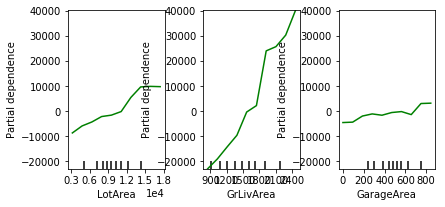

In [198]:
my_plots = plot_partial_dependence(clf,
                                   features=[3, 16, 27],
                                   X=X_train,
                                   feature_names=X.columns,
                                   grid_resolution=10
                                  )

 
**If you have any questions or hit any problems, come to the [Learn Discussion](https://www.kaggle.com/learn-forum) for help. **

**Return to [ML Course Index](https://www.kaggle.com/learn/machine-learning)**